In [ ]:
import tensorflow as tf

In [ ]:
#Load data
mnist=tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data();
x_train,x_test=x_train/255.0,x_test/255.0;


In [ ]:
#Initiazise the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),     ## Convert a 3D matrix into a 2D matrix
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),        ## We randomly select input parameters in each iteration so that there is almost equal influence/weightage given to each parameter.
    tf.keras.layers.Dense(10,activation='softmax')
])


In [ ]:
#Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2929 - accuracy: 0.9161 - val_loss: 0.1333 - val_accuracy: 0.9611
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1402 - accuracy: 0.9581 - val_loss: 0.0981 - val_accuracy: 0.9714
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1065 - accuracy: 0.9675 - val_loss: 0.0840 - val_accuracy: 0.9725
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0859 - accuracy: 0.9739 - val_loss: 0.0876 - val_accuracy: 0.9726
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0726 - accuracy: 0.9771 - val_loss: 0.0679 - val_accuracy: 0.9778
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0633 - accuracy: 0.9801 - val_loss: 0.0703 - val_accuracy: 0.9779
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0577 - accuracy: 0.9809 - val_loss: 0.0674 - val_accuracy:

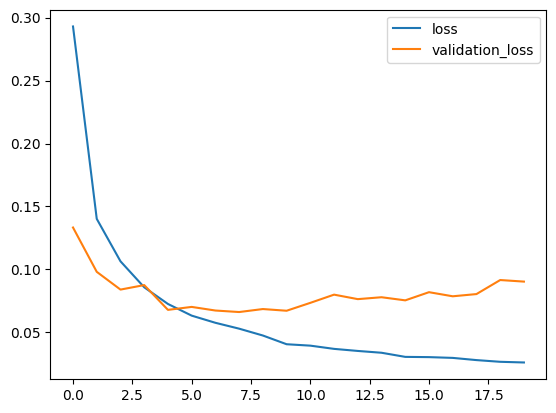

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='validation_loss')
plt.legend()

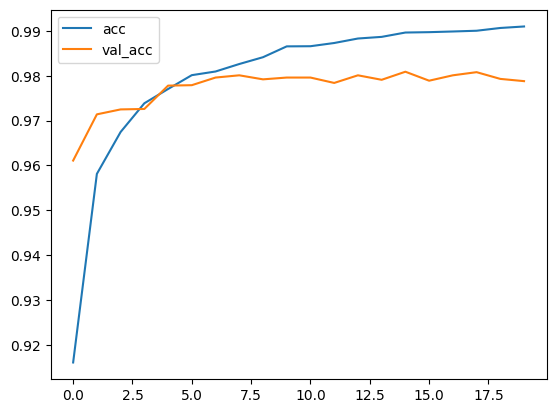

In [ ]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [ ]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0904 - accuracy: 0.9788
[0.09036587923765182, 0.9787999987602234]


313/313 [==============================] - 0s 1ms/step
Confusion matrix,without normalisation
[[ 969    1    1    2    0    1    4    1    1    0]
 [   0 1124    3    1    0    0    2    2    3    0]
 [   4    1 1007    4    1    1    2    9    3    0]
 [   0    0    1  996    0    3    0    5    3    2]
 [   0    0    2    1  961    0    6    2    1    9]
 [   2    0    0    8    1  874    1    2    3    1]
 [   2    2    1    1    2    7  941    0    2    0]
 [   2    4    4    3    2    0    0 1007    0    6]
 [   7    2    3   12    4    2    1    5  935    3]
 [   1    3    0   10   12    2    1    4    2  974]]


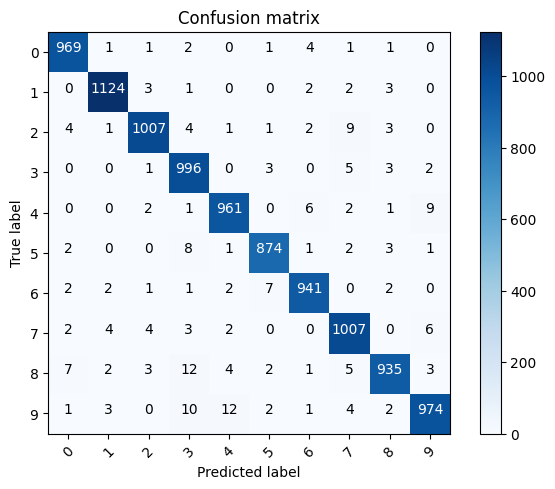

In [ ]:
#Lets plot the confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix,without normalisation')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


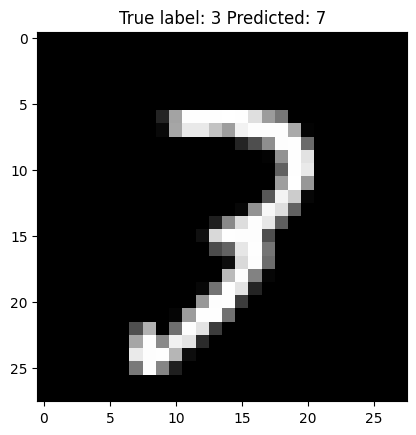

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));
##As clearly visible, the model does not entirely predict a totally wrong result. For the below pic, even a human would easily confuse this to a 7.